In [1]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('dataset_fibe/train.csv', encoding='ISO-8859-1')

# Display the first few rows
print(train_df.head())

# Get basic information about the dataset
print(train_df.info())


                                                text              target  \
0  python courses python courses, python exercise...  academic interests   
1  the learning point open digital education. a r...  academic interests   
2  tech news, latest technology, mobiles, laptops...  academic interests   
3  the best it certification materials in usa | k...  academic interests   
4  bioland scientific, for your research needs bi...  academic interests   

   Word Count  
0         125  
1         147  
2         143  
3         364  
4         176  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697527 entries, 0 to 697526
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        697527 non-null  object
 1   target      697527 non-null  object
 2   Word Count  697527 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.0+ MB
None


In [2]:
# Check for missing values
print(train_df.isnull().sum())


text          0
target        0
Word Count    0
dtype: int64


In [3]:
# Check for duplicate entries
duplicate_count = train_df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

# Optionally, remove duplicates
train_df = train_df.drop_duplicates().reset_index(drop=True)

Number of duplicate rows: 564


In [4]:
# Check data types
print(train_df.dtypes)


text          object
target        object
Word Count     int64
dtype: object


target
academic interests                           58484
books and literature                         40419
healthy living                               30940
careers                                      30258
news and politics                            30185
shopping                                     29487
style and fashion                            29130
family and relationships                     28941
business and finance                         28015
automotives                                  27986
pharmaceuticals, conditions, and symptoms    26596
arts and culture                             26344
sports                                       24532
pets                                         24122
hobbies and interests                        23936
real estate                                  23830
food and drinks                              23424
home and garden                              23001
video gaming                                 22941
movies                  

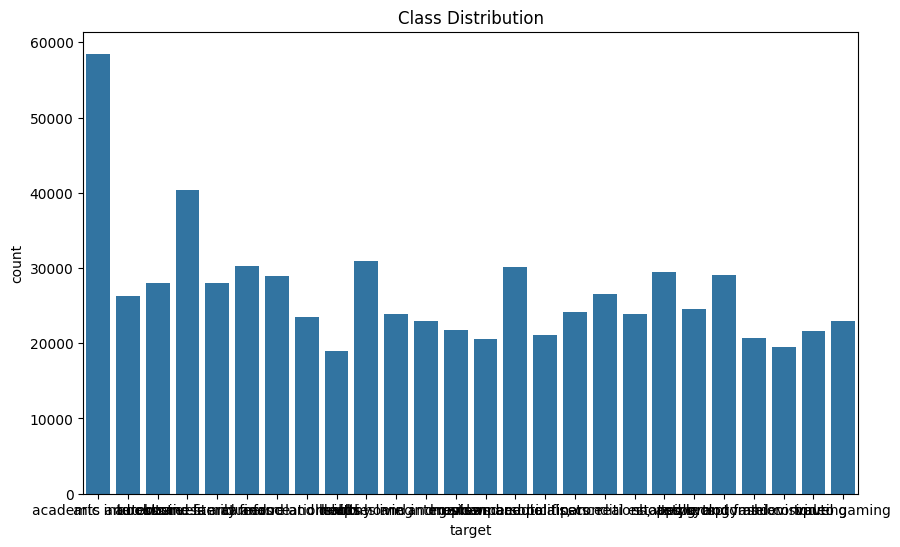

In [5]:
# Check the distribution of target classes
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = train_df['target'].value_counts()
print(class_counts)

# Plot the class distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=train_df)
plt.title('Class Distribution')
plt.show()

In [6]:
# Calculate percentage distribution
class_percentages = train_df['target'].value_counts(normalize=True) * 100
print(class_percentages)

target
academic interests                           8.391263
books and literature                         5.799304
healthy living                               4.439260
careers                                      4.341407
news and politics                            4.330933
shopping                                     4.230784
style and fashion                            4.179562
family and relationships                     4.152444
business and finance                         4.019582
automotives                                  4.015421
pharmaceuticals, conditions, and symptoms    3.815984
arts and culture                             3.779828
sports                                       3.519843
pets                                         3.461016
hobbies and interests                        3.434329
real estate                                  3.419120
food and drinks                              3.360867
home and garden                              3.300175
video gaming         

count    696963.000000
mean        305.863254
std         137.746320
min         100.000000
25%         179.000000
50%         291.000000
75%         445.000000
max         651.000000
Name: text_length, dtype: float64


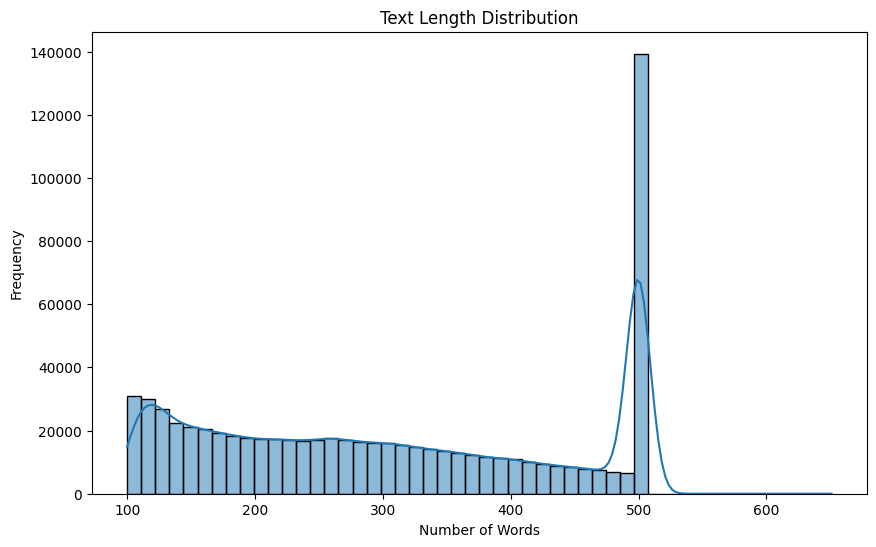

In [7]:
# Add a new column for text length
train_df['text_length'] = train_df['text'].apply(lambda x: len(str(x).split()))

# Summary statistics of text length
print(train_df['text_length'].describe())

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


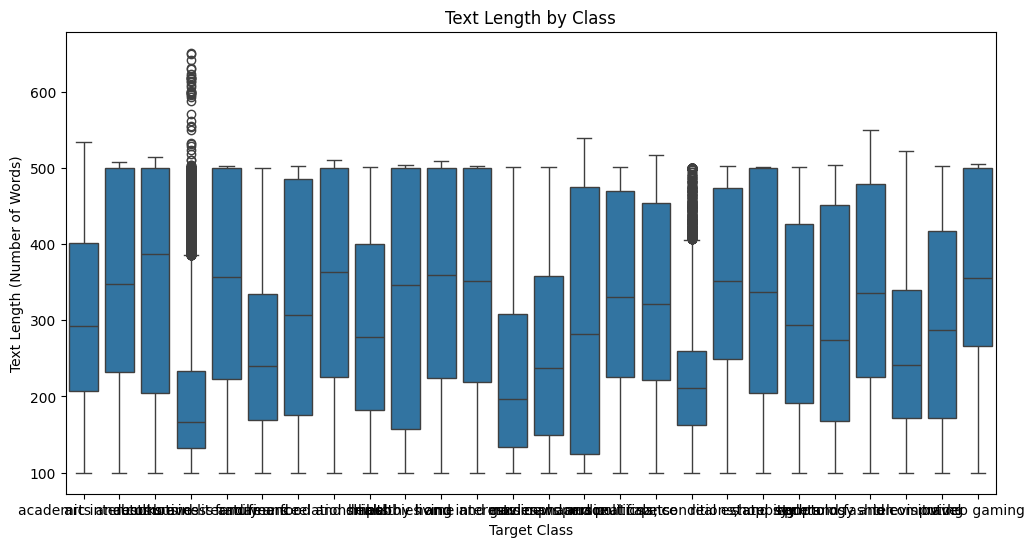

In [8]:
# Boxplot of text length by target class
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='text_length', data=train_df)
plt.title('Text Length by Class')
plt.xlabel('Target Class')
plt.ylabel('Text Length (Number of Words)')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91898\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words: [('said', 703160), ('also', 586544), ('one', 367634), ('would', 322071), ('like', 283205), ('new', 279233), ('people', 256162), ('first', 245102), ('Rs', 241042), ('two', 237522), ('time', 230500), ('get', 224776), ('government', 210964), ('India', 198826), ('take', 190791), ('last', 183565), ('may', 183450), ('per', 179052), ('make', 178534), ('said.', 178116)]


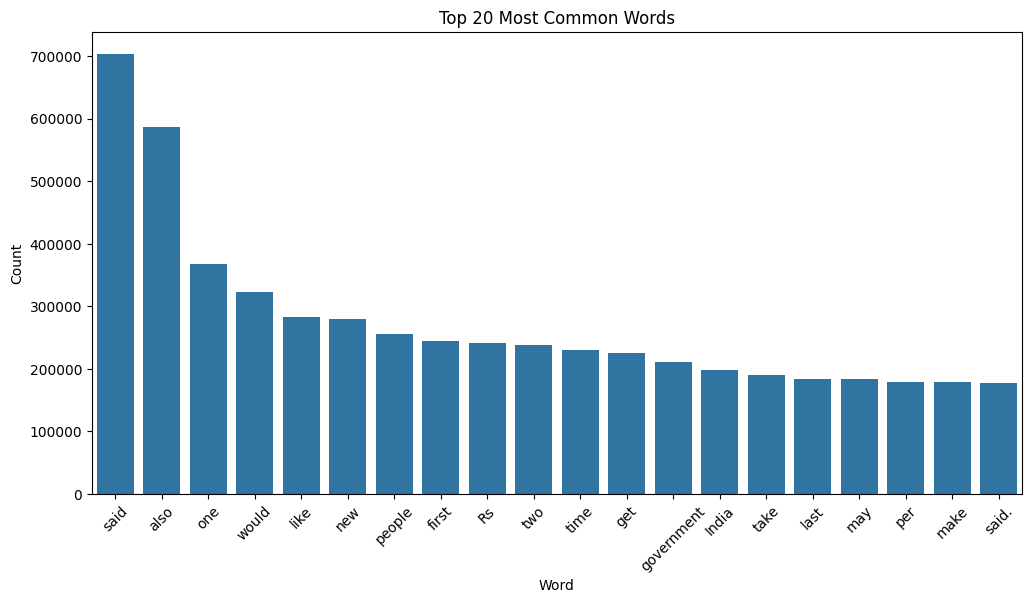

In [9]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine all text data
all_text = ' '.join(train_df['text'].astype(str))

# Tokenize the text
words = all_text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words]

# Get the most common words
word_counts = Counter(words)
common_words = word_counts.most_common(20)
print("Most Common Words:", common_words)

# Plot the most common words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a bigram vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_counts = bigram_vectorizer.fit_transform(train_df['text'].astype(str))

# Sum up the counts of each bigram
bigram_sums = bigram_counts.sum(axis=0)
bigrams_freq = [(bigram, bigram_sums[0, idx])
                for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)

# Get the top 20 bigrams
top_bigrams = bigrams_freq[:20]
print("Top 20 Bigrams:", top_bigrams)

# Plot the top bigrams
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Bigram', y='Count', data=top_bigrams_df)
plt.title('Top 20 Bigrams')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a trigram vectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigram_counts = trigram_vectorizer.fit_transform(train_df['text'].astype(str))

# Sum up the counts of each trigram
trigram_sums = trigram_counts.sum(axis=0)
trigrams_freq = [(trigram, trigram_sums[0, idx])
                 for trigram, idx in trigram_vectorizer.vocabulary_.items()]
trigrams_freq = sorted(trigrams_freq, key=lambda x: x[1], reverse=True)

# Get the top 20 trigrams
top_trigrams = trigrams_freq[:20]
print("Top 20 Trigrams:", top_trigrams)

# Plot the top trigrams
top_trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Trigram', y='Count', data=top_trigrams_df)
plt.title('Top 20 Trigrams')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate correlation
correlation = train_df[['text_length', 'target']].corr()
print(correlation)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='target', data=train_df)
plt.title('Text Length vs. Target')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Target Class')
plt.show()

In [ ]:
from collections import defaultdict

# Initialize a dictionary to hold word counts for each class
class_word_counts = defaultdict(Counter)

# Iterate over each class
for target_class in train_df['target'].unique():
    class_text = ' '.join(
        train_df[train_df['target'] == target_class]['text'].astype(str))
    words = class_text.split()
    words = [word for word in words if word.lower() not in stop_words]
    class_word_counts[target_class].update(words)

# Display the most common words for each class
for target_class, counter in class_word_counts.items():
    print(f"\nMost common words in class {target_class}:")
    print(counter.most_common(10))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(train_df['text'].astype(str))

# Reduce dimensions with PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(tfidf_features.toarray())

# Further reduce dimensions with t-SNE
tsne = TSNE(n_components=2, verbose=1, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

# Add t-SNE results to the dataframe
train_df['tsne-2d-one'] = tsne_results[:, 0]
train_df['tsne-2d-two'] = tsne_results[:, 1]

# Plot the results
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='target',
    palette=sns.color_palette('hls', len(train_df['target'].unique())),
    data=train_df,
    legend='full',
    alpha=0.3
)
plt.title('t-SNE Visualization of Text Data')
plt.show()

In [ ]:
# Identify texts with extreme lengths
print("Longest texts:")
print(train_df.nlargest(5, 'text_length')['text'])

print("\nShortest texts:")
print(train_df.nsmallest(5, 'text_length')['text'])

In [ ]:
# Bar plot of class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=train_df)
plt.title('Class Distribution')
plt.show()

# If imbalance is significant, you might consider:
# - Oversampling minority classes
# - Undersampling majority classes
# - Using class weights in your model

In [ ]:
# Example: Number of exclamation marks
train_df['exclamation_count'] = train_df['text'].apply(lambda x: x.count('!'))

# Correlation with target
correlation = train_df[['exclamation_count', 'target']].corr()
print(correlation)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='exclamation_count', data=train_df)
plt.title('Exclamation Count by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Number of Exclamation Marks')
plt.show()

In [ ]:
# Install gensim if not already installed
# !pip install gensim

from gensim.models import Word2Vec

# Prepare data for Word2Vec
sentences = train_df['text'].astype(str).apply(lambda x: x.split()).tolist()

# Train a Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100,
                     window=5, min_count=5, workers=4)

# Visualize word embeddings using t-SNE
words = list(w2v_model.wv.index_to_key)
word_vectors = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(word_vectors)

# Create a DataFrame for visualization
embedding_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
embedding_df['word'] = words

# Plot the embeddings
plt.figure(figsize=(16, 10))
sns.scatterplot(x='x', y='y', data=embedding_df)
for i in range(len(embedding_df)):
    plt.text(embedding_df['x'][i], embedding_df['y']
             [i], embedding_df['word'][i])
plt.title('Word Embedding Visualization')
plt.show()

In [9]:
print(train_df.columns)

Index(['text', 'target', 'Word Count', 'cleaned_text'], dtype='object')


In [8]:
print(test_df.columns)

Index(['text', 'Word Count', 'Index', 'cleaned_text'], dtype='object')


In [11]:
print(train_df.head())

                                                text              target  \
0  python courses python courses, python exercise...  academic interests   
1  the learning point open digital education. a r...  academic interests   
2  tech news, latest technology, mobiles, laptops...  academic interests   
3  the best it certification materials in usa | k...  academic interests   
4  bioland scientific, for your research needs bi...  academic interests   

   Word Count                                       cleaned_text  
0         125  python courses python courses python exercise ...  
1         147  learning point open digital education reposito...  
2         143  tech news latest technology mobiles laptops nd...  
3         364  best certification materials usa killtest lead...  
4         176  bioland scientific research needs bioland scie...  


In [12]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
from tqdm import tqdm  # Import tqdm for the progress bar

# Download NLTK stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the text preprocessing function


def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = BeautifulSoup(text, "lxml").text

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


# Load your data
train_df = pd.read_csv(
    'C:/Users/91898/Code/fibe/dataset_fibe/train.csv', encoding='ISO-8859-1')
test_df = pd.read_csv(
    'C:/Users/91898/Code/fibe/dataset_fibe/test.csv', encoding='ISO-8859-1')

# Apply preprocessing to the training data with a progress bar
tqdm.pandas(desc="Processing training data")
train_df['cleaned_text'] = train_df['text'].progress_apply(preprocess_text)

# Save the cleaned training data to a separate CSV file
train_df[['text', 'target', 'Word Count']].to_csv('train_cleaned.csv', index=False)
print("Saved cleaned training data to train_cleaned.csv")
# Apply preprocessing to the test data with a progress bar
tqdm.pandas(desc="Processing test data")
test_df['cleaned_text'] = test_df['text'].progress_apply(preprocess_text)

# Save the cleaned test data to a separate CSV file
test_df[['text', 'Word Count', 'Index']].to_csv('test_cleaned.csv', index=False)
print("Saved cleaned test data to test_cleaned.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91898\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Processing training data: 100%|██████████| 697527/697527 [03:19<00:00, 3500.60it/s]


Saved cleaned training data to train_cleaned.csv


Processing test data: 100%|██████████| 174382/174382 [00:43<00:00, 4015.94it/s]


Saved cleaned test data to test_cleaned.csv
